## 1. Multi-Class Classification:
For the multiclass classification problem, there were six different datasets. Some of the datasets contain missing values. For example, TrainData1, TestData1 and TrainData3 contain some missing values (1.00000000000000e+99). Therefore, the first approach needs to handle the missing values for selecting the features. Then compare the accuracy on train dataset to find out which classifier gives best result for each dataset with cross validation to verify the accuracy based on test dataset.
<center><div style='width:50%; height:50%'><img src='images/Q1_table.jpg'></div></center>

Hint:
* Missing Value Estimation
    - (KNN method for imputation of the missing values)
* Dimensionality Reduction
* Use Several Classifiers/ Ensemble Method
    - Logistic Regression (with different c values)
    - Random Forest (with different estimator values)
    - SVM (with different kernels)
    - KNN (with k = 1,2,5,10,20)
    - K (3,5,10) Fold Cross Validation
* Performance Comparison
    - Classification Accuracy, Precision, Recall, Sensitivity, Specificity
    - AUC, ROC Curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA

# SVM
from sklearn.svm import *

# KNN
from sklearn.neighbors import KNeighborsClassifier
from impyute.imputation.cs import fast_knn

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydotplus import *

# SVM
from sklearn.svm import SVC, LinearSVC

In [3]:
def optimizeK(X_train, y_train, X_test, y_test):
    neighbors = np.arange(1,20)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))
    
    for i,k in enumerate(neighbors):

        knn = KNeighborsClassifier(n_neighbors=k)

        knn.fit(X_train, y_train)

        train_accuracy[i] = knn.score(X_train, y_train)

        test_accuracy[i] = knn.score(X_test, y_test2)
        
    return neighbors, test_accuracy, train_accuracy

In [4]:
def plotK(neighbors, test_accuracy, train_accuracy):
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training Accuracy')
        plt.legend()
        plt.xlabel('Number of Neighbors')
        plt.xticks(np.arange(0, neighbors[-1], step=1))
        plt.ylabel('Accuracy')
        plt.title('KNN Varying Number of Neighbors')
        plt.show()

In [5]:
X_train2 = pd.read_csv('data/1/TrainData2.txt', delimiter='\s+', header=None)
X_train3 = pd.read_csv('data/1/TrainData3.txt', delimiter='\s+', header=None)
X_train4 = pd.read_csv('data/1/TrainData4.txt', delimiter='\s+', header=None)

In [6]:
y_train2 = pd.read_csv('data/1/TrainLabel2.txt', delimiter='\n', header=None)
y_train3 = pd.read_csv('data/1/TrainLabel3.txt', delimiter='\n', header=None)
y_train4 = pd.read_csv('data/1/TrainLabel4.txt', delimiter='\n', header=None)

In [7]:
X_test2 = pd.read_csv('data/1/TestData2.txt', delimiter='\s+', header=None)
X_test3 = pd.read_csv('data/1/TestData3.txt', delimiter=',',   header=None)
X_test4 = pd.read_csv('data/1/TestData4.txt', delimiter='\s+', header=None)

In [8]:
X_training = [X_train2, X_train3, X_train4]
y_training = [y_train2, y_train3, y_train4]
X_testing = [X_test2, X_test3, X_test4]

In [12]:
for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)


In [15]:
for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)


In [16]:
for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)


# _Dataset 2_

### PCA for DS2

In [17]:
X_train2.shape

(100, 9182)

In [18]:
y_train2.shape

(100, 1)

In [19]:
y_train2.head()

,0
0,1
1,1
2,1
3,1
4,1


In [20]:
y_train2.tail()

,0
95,11
96,11
97,11
98,11
99,11


In [21]:
X_test2.shape

(74, 9182)

In [22]:
xTrain2PCA = PCA(n_components=74)
X_train2_pca = xTrain2PCA.fit_transform(X_train2)

In [23]:
# 100 principle components can explain 99% of the data

X_train2_pca_var = xTrain2PCA.fit(X_train2)
print(sum(X_train2_pca_var.explained_variance_ratio_))
print(X_train2_pca.shape)

0.9287852222496773
(100, 74)


In [24]:
# 74 principle components can explain 99% of the data
xTest2PCA = PCA(n_components=74)
X_test2_pca = xTest2PCA.fit_transform(X_test2)

In [25]:
X_test2_pca_var = xTest2PCA.fit(X_test2)
print(sum(X_test2_pca_var.explained_variance_ratio_))
print(X_test2_pca.shape)

1.0
(74, 74)


In [26]:
X_train2_cmp = pd.DataFrame(X_train2_pca)
X_train2_cmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-26.398235,-5.530790,13.539574,-3.261454,0.091592,1.422952,-2.226075,-2.378404,-0.173590,-0.229678,...,-1.330566,0.760020,0.411290,-3.154955,2.029205,0.371575,0.641591,-0.315040,-1.015912,-0.201491
1,-23.599232,-8.284542,14.064246,-1.687287,1.326062,4.722244,-1.644201,-2.860067,-2.502393,1.829240,...,-0.465511,1.127581,0.700681,-0.714230,1.360685,-1.327478,0.615863,-1.337370,1.129912,-0.601099
2,-15.135961,-7.972684,16.700653,-5.440529,3.488567,5.183090,-1.611984,-1.053902,0.417829,-1.267439,...,1.089887,-0.017774,-1.412615,0.434332,0.993812,0.538806,-0.410474,-0.676295,-1.678395,-0.167683
3,-18.103189,-5.975542,16.094560,-3.843836,2.276547,3.666287,-2.545452,-1.866662,-1.184474,-0.839445,...,0.183808,-1.128415,-1.607940,2.023086,-1.032967,3.239298,0.012201,0.195308,1.198384,-0.608230
4,-22.822826,-6.600625,9.438649,-4.610983,-1.248990,3.858556,-1.569932,-4.665742,0.619610,-1.132427,...,0.288800,-2.899142,0.410552,-0.469969,0.084135,-0.083044,0.480569,0.621397,-3.289133,2.460916
5,-18.592907,-7.772098,10.935275,-3.627123,0.250229,6.492181,0.789110,-3.185556,1.906020,-1.889865,...,2.394179,-2.192005,0.260057,3.041451,-3.959357,0.815341,0.147999,0.114778,-0.143002,-0.502871
6,-18.252123,-7.872843,10.589447,-4.421729,3.189031,3.490895,-0.284547,-0.683897,0.542263,1.135101,...,1.108318,-0.808098,-1.003234,-1.417343,-0.364829,0.577774,-0.299254,0.284120,1.352460,-1.211682
7,-17.599639,-10.100547,13.873913,-4.178510,2.441240,5.263544,-0.336828,-0.244063,1.713345,0.965288,...,-0.248227,1.212763,0.489692,-0.776411,0.792993,-2.843971,-0.387416,-1.098336,2.091966,0.773769
8,-24.282513,-6.514785,12.622519,-2.874137,1.605758,3.104993,-1.459444,-1.697107,-1.219725,0.893702,...,-1.289588,0.358682,-0.857802,-3.062720,1.946342,0.433660,-0.167877,0.506195,-0.429796,-0.813211
9,-19.073462,-6.858019,16.699833,-2.936940,2.511104,5.214212,-2.587564,-1.449672,3.503999,0.990876,...,-1.264628,1.998371,1.899509,3.334181,-1.994884,-1.104957,-0.736980,1.665473,0.542295,0.996836


In [27]:
X_test2_cmp = pd.DataFrame(X_test2_pca)
X_test2_cmp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-10.398547,2.226483,-0.658507,0.728649,-3.004981,-1.459457,11.538866,0.131821,-3.003679,8.534441,...,-0.018208,-0.591814,-0.158086,0.552216,0.711834,-0.246909,0.286311,0.049778,2.417375e-14,1.751869e-19
1,-9.148466,-1.053395,2.558946,6.409951,-1.139522,14.874160,12.840859,-1.954532,-1.438027,-3.864114,...,1.078071,2.187830,0.146664,-0.497945,0.557118,1.027339,-0.469129,-0.694673,2.417375e-14,1.751869e-19
2,-9.518250,8.940772,-7.869489,6.712257,5.851278,-4.459876,1.175211,9.256822,-2.179910,-2.784083,...,-0.775006,0.586132,0.017582,-0.994174,-0.862647,0.138018,-0.702943,-0.308250,2.417375e-14,1.751869e-19
3,-3.430898,4.484006,8.917650,-5.211835,3.051420,-7.458819,8.400516,-2.596811,-6.939696,2.710260,...,0.501017,-0.003214,-0.102685,0.572909,-0.200991,-0.957525,-0.212132,-0.013422,2.417375e-14,1.751869e-19
4,-1.953057,-10.889354,-4.247043,-4.255280,8.396341,-4.124702,1.326687,3.342917,-1.886089,-0.442950,...,-4.006541,1.502856,0.414789,0.816762,0.849764,-0.002994,-0.217039,0.212119,2.417375e-14,1.751869e-19
5,-9.114472,30.661399,-16.602591,-13.681703,2.121322,-3.888211,14.515758,-0.522400,15.452621,2.824357,...,-0.026268,0.064399,0.062601,0.329610,-0.000407,-0.151348,0.321557,0.058960,2.417375e-14,1.751869e-19
6,-4.265600,-12.394460,-0.936758,-0.831384,3.428773,2.155973,1.140246,-5.377360,1.021447,9.118232,...,-0.159312,1.469154,-1.448169,-1.886565,1.829980,-0.307286,-0.105608,-0.261595,2.417375e-14,1.751869e-19
7,-4.660430,-10.362650,-4.043087,-3.373387,3.434039,2.838975,-0.694445,4.525555,1.816828,2.884826,...,-1.118630,-1.292512,2.199333,0.609899,-2.353852,1.178842,-0.321623,0.223460,2.417375e-14,1.751869e-19
8,-3.686264,2.464987,-0.372169,-5.940278,-0.656506,-5.937303,1.116711,3.091034,-2.422265,-0.681678,...,-0.262838,-0.473030,-0.149251,0.003186,-0.580069,0.571946,0.236134,-0.023115,2.417375e-14,1.751869e-19
9,-21.698063,33.851093,-19.187314,-7.433600,-4.502362,2.815571,-4.050009,-3.314655,-14.344385,9.912675,...,0.587508,0.378001,-0.159303,0.175027,0.189138,-0.023102,0.254395,-0.091289,2.417375e-14,1.751869e-19


In [28]:
X_train2_cmp.shape

(100, 74)

In [29]:
y_train2.shape

(100, 1)

In [30]:
X_test2_cmp.shape

(74, 74)

### KNN for DS2

In [31]:
# KNN to obtain y_test1 values

knn = KNeighborsClassifier(n_neighbors=5)

knn = knn.fit(X_train2_cmp, y_train2)
y_test2_pred = knn.predict(X_test2_cmp)

In [32]:
y_test2 = y_test2_pred

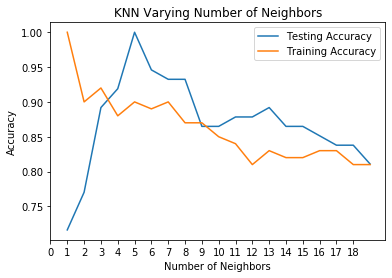

In [33]:
# Run KNN to determine optimal K value

n, test_acc, train_acc = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2)
plotK(n, test_acc, train_acc)

In [34]:
n_neighbors=3
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train2_cmp, y_train2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [35]:
knn.score(X_test2_cmp, y_test2)

0.8918918918918919

In [36]:
knn_y_pred = knn.predict(X_test2_cmp)

In [37]:
knn_cm = confusion_matrix(y_test2, knn_y_pred)
print(knn_cm)

[[13  0  0  1  0  0  0  0  1]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 1  0  0 17  0  0  0  0  0]
 [ 0  0  0  1  1  0  0  0  0]
 [ 0  1  0  0  0 23  0  1  0]
 [ 1  0  0  0  0  0  5  0  0]
 [ 0  1  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  1]]


In [38]:
pd.crosstab(y_test2, knn_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,8,9,11,All
True,,,,,,,,,,
1,13,0,0,1,0,0,0,0,1,15
2,0,1,0,0,0,0,0,0,0,1
3,0,0,4,0,0,0,0,0,0,4
4,1,0,0,17,0,0,0,0,0,18
5,0,0,0,1,1,0,0,0,0,2
6,0,1,0,0,0,23,0,1,0,25
8,1,0,0,0,0,0,5,0,0,6
9,0,1,0,0,0,0,0,1,0,2
11,0,0,0,0,0,0,0,0,1,1


In [39]:
knn_cr = classification_report(y_test2, knn_y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         4
           4       0.89      0.94      0.92        18
           5       1.00      0.50      0.67         2
           6       1.00      0.92      0.96        25
           8       1.00      0.83      0.91         6
           9       0.50      0.50      0.50         2
          11       0.50      1.00      0.67         1

    accuracy                           0.89        74
   macro avg       0.79      0.84      0.78        74
weighted avg       0.92      0.89      0.90        74



In [75]:
def calculateMulticlassROCAUC(X_train, y_train, X_test, y_test, n, ident, k):
    labels = np.arange(1,n+1)
    y_bin = label_binarize(y_test, classes=labels)

    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n):
        fpr[i], tpr[i], thresholds = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    for i in range(n):
        if math.isnan(roc_auc[i]):
            score = 0
        else: 
            score = roc_auc[i]
        plt.plot(fpr[i], tpr[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        plt.title(f'ROC Curve Label {i}, {ident}={k}, Score={score}')
        plt.show()

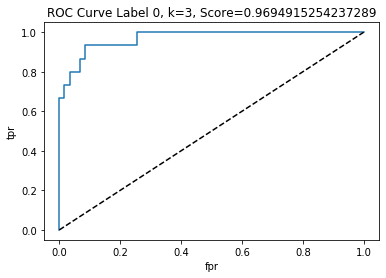

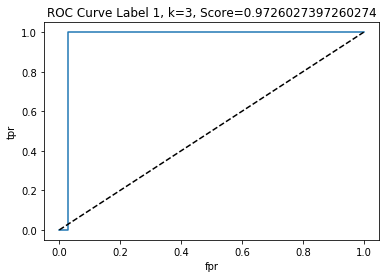

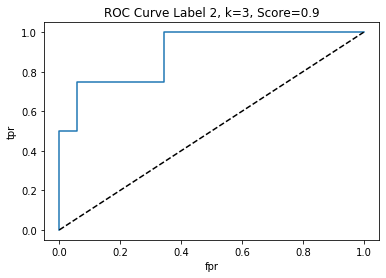

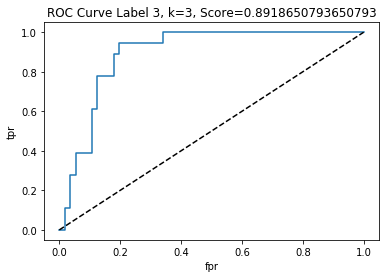

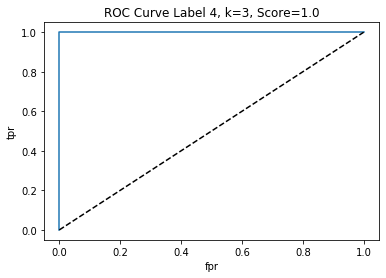

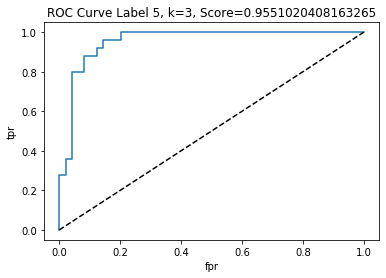

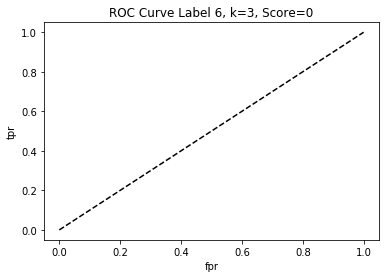

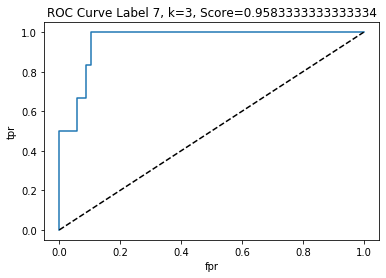

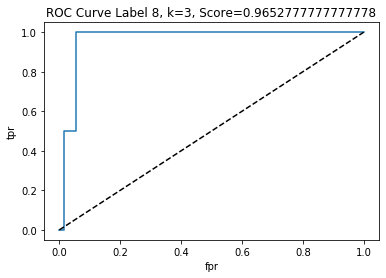

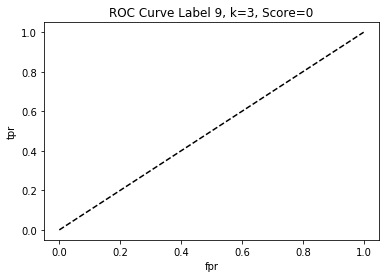

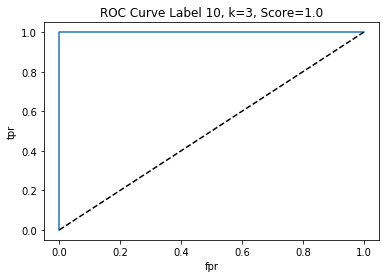

In [76]:
calculateMulticlassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 11, 'k', 3)

In [167]:
def trainFitAccuracyLR(s, e, X_train, y_train, X_test, y_test):    
    c = np.arange(s, e+1)
    cma = {}
    cra = {}
    acc = {}
    preds = {}
    for i in c:    
        lr = LogisticRegression(C=i, solver='lbfgs',random_state=0)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        cma[i] = confusion_matrix(y_test, y_pred)
        cra[i] = classification_report(y_test, y_pred)
        acc[i] = (accuracy_score(y_test, y_pred))
        preds[i] = y_pred
    return cma, cra, acc, preds

### Logistic Regression for DS2

In [184]:
confusion_matrices, classification_reports = trainFitAccuracyLR(1, 5, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

    print(f'{confusion_matrix(y_test2, lr_y_pred)}')
    print(f'\n\t   Logistic Regression Classification Report\n{lr_cr}')
    print(classification_report(y_test, y_pred))
    
c = 10
confusion_matricies, classification_reports, accuracies, predictions = trainFitAccuracyLR(1, c, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

In [195]:
import operator
k = max(accuracies.items(), key=operator.itemgetter(1))[0]
v = float(max(accuracies.items(), key=operator.itemgetter(1))[1])

In [200]:
print(f'Logistic Regression Confusion Matrix\n\n{confusion_matricies[k]}')
print(f'\n\t   Logistic Regression Classification Report, C={k}\n\n{classification_reports[k]}')

Logistic Regression Confusion Matrix

[[ 8  0  0  0  2  0  0  1  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  1 11  2  0  0  0  2  2  0]
 [ 0  0  0  0  2  0  0  0  0  0  0]
 [ 0  2  2  0  2 12  2  0  1  1  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]

	   Logistic Regression Classification Report, C=5

              precision    recall  f1-score   support

           1       1.00      0.53      0.70        15
           2       0.25      1.00      0.40         1
           3       0.40      0.50      0.44         4
           4       1.00      0.61      0.76        18
           5       0.25      1.00      0.40         2
           6       1.00      0.48      0.65        25
           7       0.00      0.00      0.00         0
           8       0.67      0.67      0.67         6
           9       0.20  

## Random Forest for DS2

## SVM for DS2

# Dataset 3

In [47]:
# X_train3
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.000000e+99
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.000000e+00
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.000000e+00
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00


In [48]:
n = X_train3[12][0]

for i in X_train3.keys():
    X_train3[i] = X_train3[i].replace(n, np.nan)

In [49]:
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,NaN
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0


In [50]:
# X_train3_clean = fast_knn(X_train1.values, k=100)

In [51]:
# # Logistic Regression
# log_reg = LogisticRegression(solver='lbfgs')
# log_reg.fit(X_train1, y_train1)